# 1. Análise Exploratória de Dados

In [25]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import export_graphviz
import graphviz  # https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation

In [26]:
# Definindo caminho dos dados
dir_path = './CMAPSSData/'
train_file = 'train_FD003.txt'
test_file = 'test_FD003.txt'

# Definindo o nome das colunas para facilitar a exploração dos dados
index_names = ['unidade', 'ciclo_tempo']
setting_names = ['config_1', 'config_2', 'config_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

# Lendo os dados
train = pd.read_csv((dir_path+train_file), sep='\s+', header=None, 
                 names=col_names)
test = pd.read_csv((dir_path+test_file), sep='\s+', header=None, 
                 names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD003.txt'), sep='\s+', header=None, 
                 names=['RemainingUsefulLife'])

# Analisar as primeiras linhas da nossa base de dados
print(train.shape)
train.head()

(24720, 26)


,unidade,ciclo_tempo,config_1,config_2,config_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [27]:
# Analisando os ciclos de tempo
train[index_names].groupby('unidade').max().describe()

,ciclo_tempo
count,100.00000
mean,247.20000
std,86.48384
min,145.00000
25%,189.75000
50%,220.50000
75%,279.75000
max,525.00000


In [28]:
# Inspecionando alguns dados estatisticos do conjunto
# Sensores com desvio padrao proximos de 0 nao agregam informacao ao modelo
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


In [29]:
def add_RUL(df):
    # Obter o numero total de ciclos para cada unidade
    grouped_by_unit = df.groupby(by="unidade")
    max_cycle = grouped_by_unit["ciclo_tempo"].max()
    
    # Mesclar o valor do ciclo maximo no dataframe de origem
    result_frame = df.merge(max_cycle.to_frame(name='ciclo_max'), left_on='unidade', right_index=True)
    
    # Calcular o RUL para cada linha
    remaining_useful_life = result_frame["ciclo_max"] - result_frame["ciclo_tempo"]
    result_frame["RUL"] = remaining_useful_life
    
    # Remover o valor do ciclo maximo, que nao e mais necessario
    result_frame = result_frame.drop("ciclo_max", axis=1)
    return result_frame
  
train = add_RUL(train)
train[index_names+['RUL']].head()

,unidade,ciclo_tempo,RUL
0,1,1,258
1,1,2,257
2,1,3,256
3,1,4,255
4,1,5,254


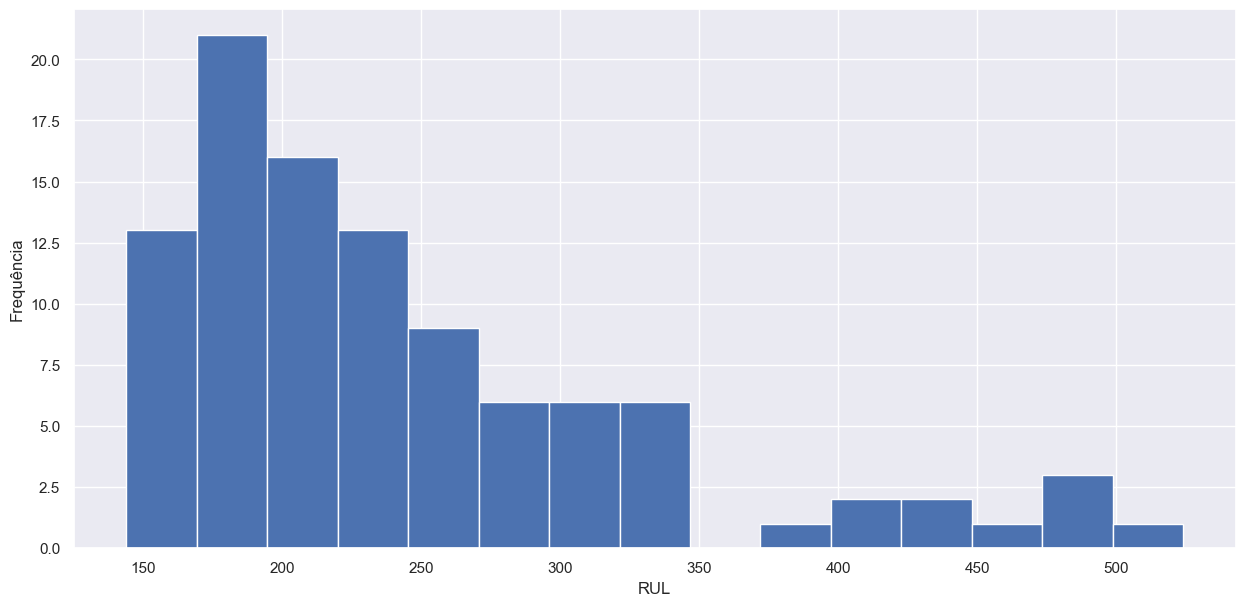

In [30]:
df_max_rul = train[['unidade', 'RUL']].groupby('unidade').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('Frequência')
plt.show()

# 2. Análise gráfica do comportamento dos sensores

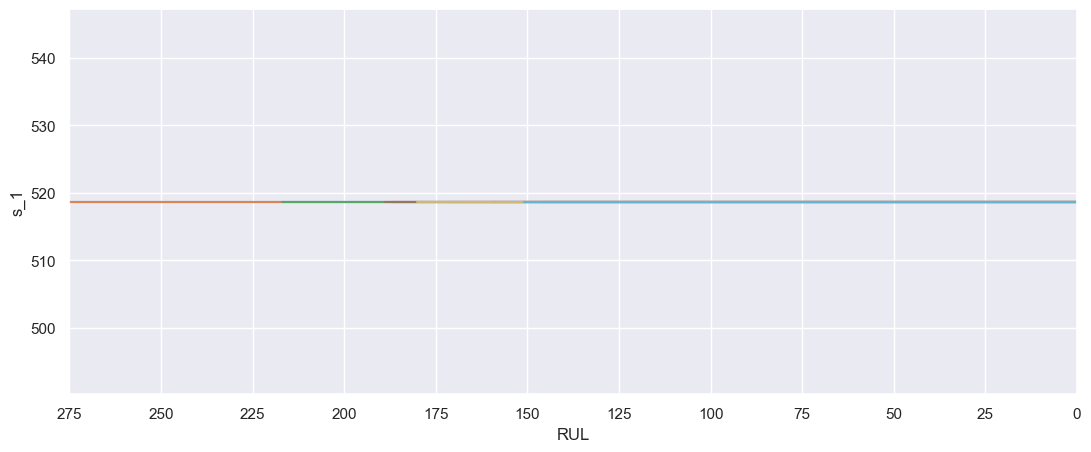

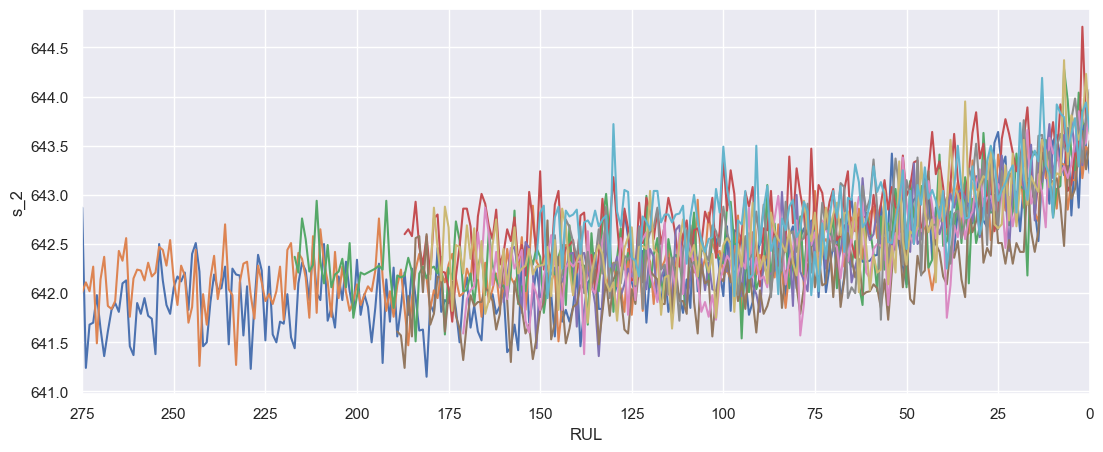

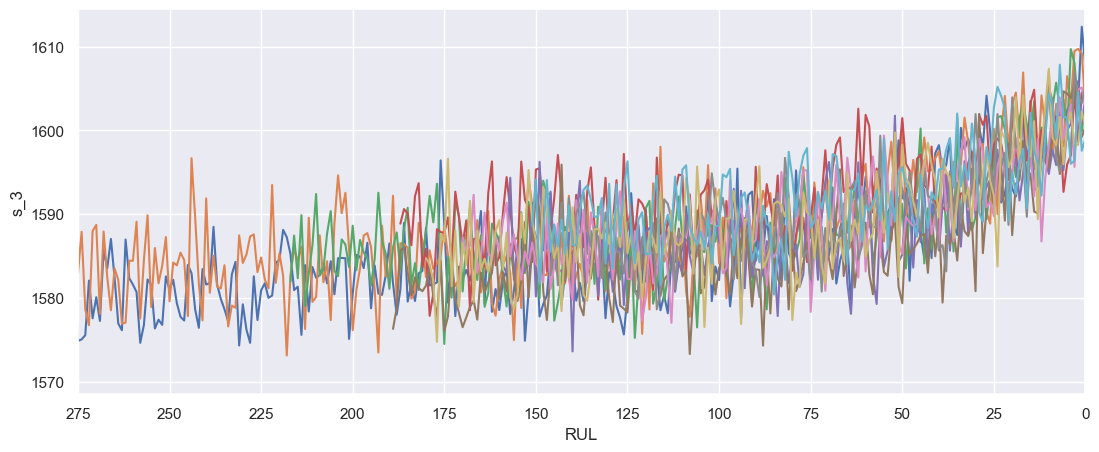

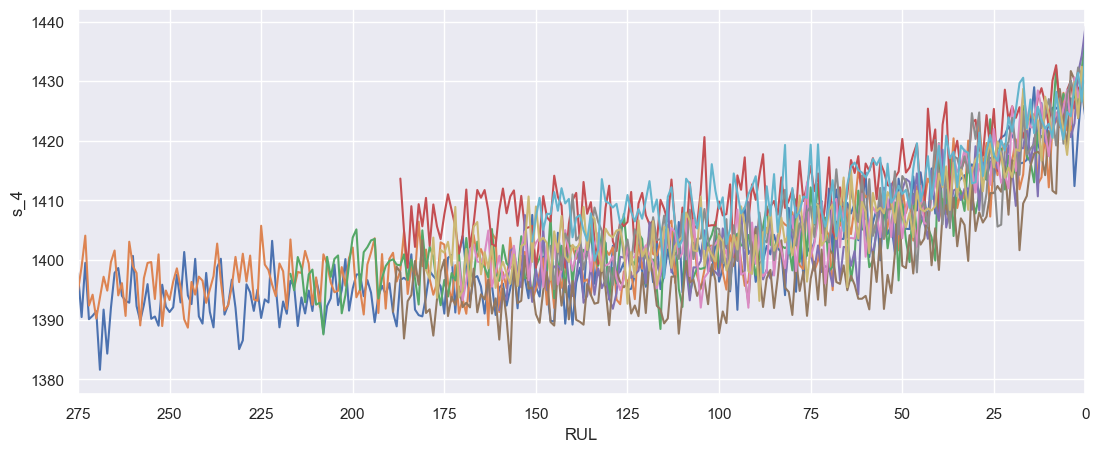

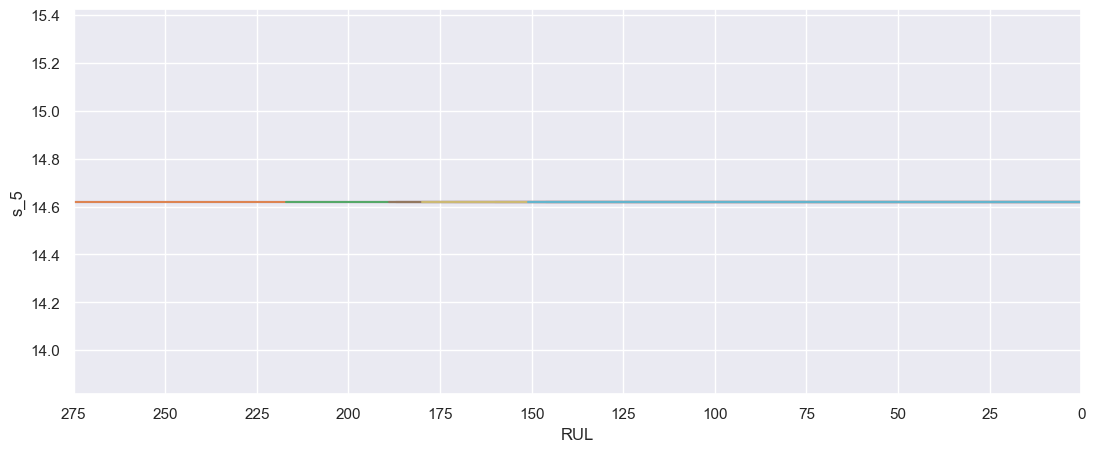

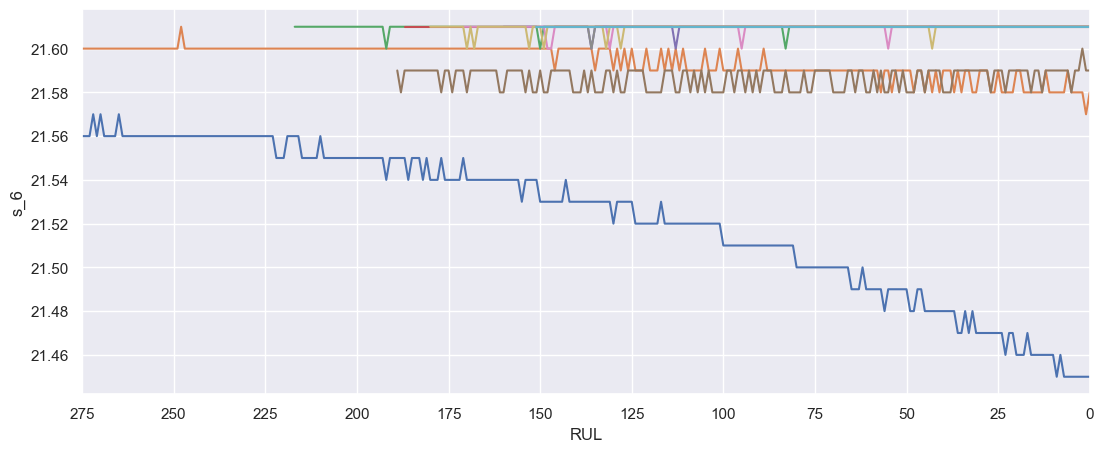

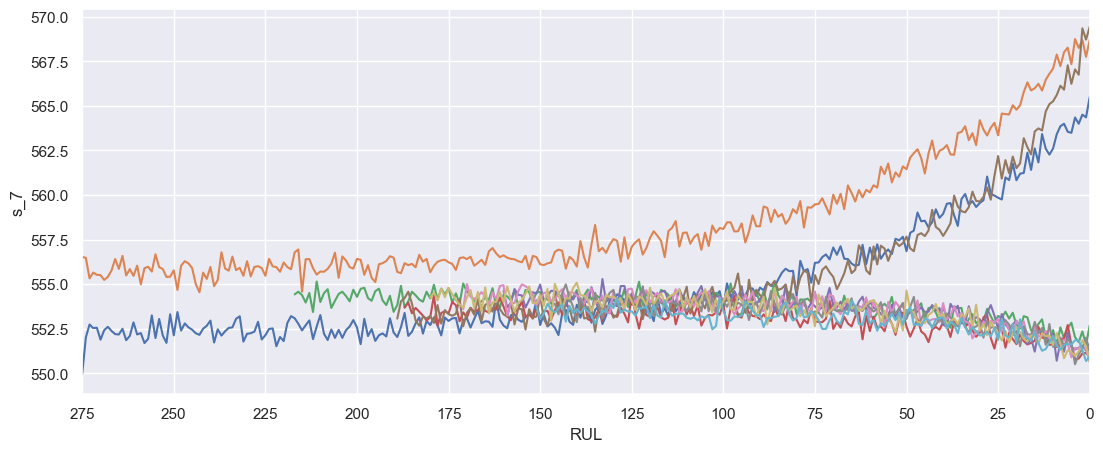

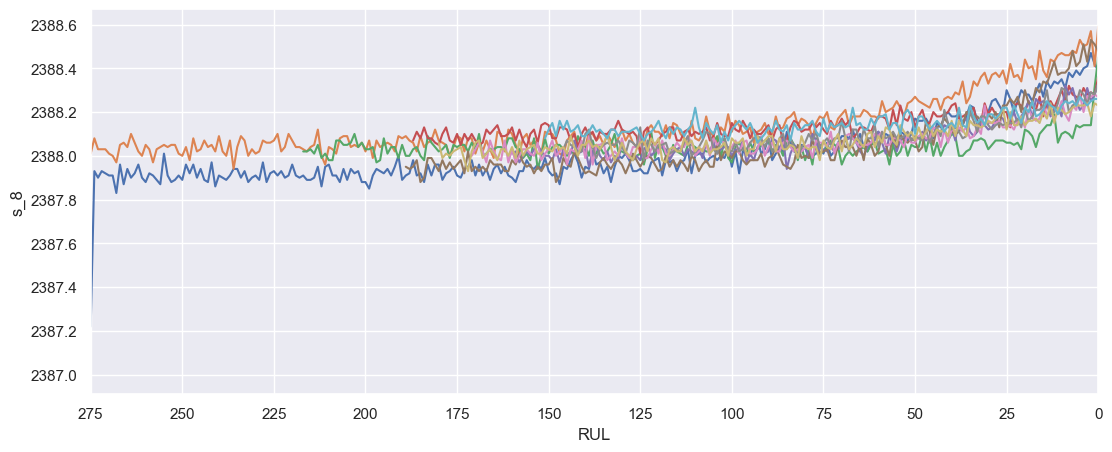

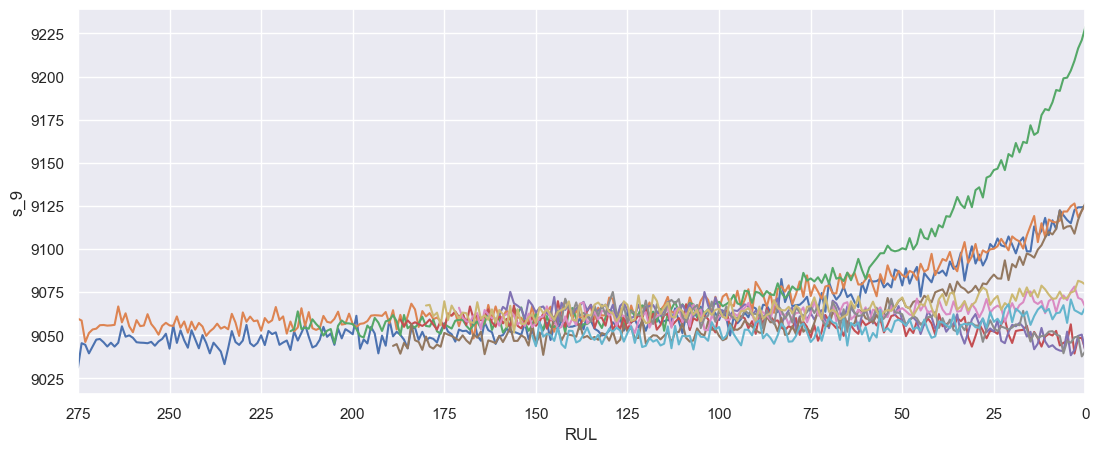

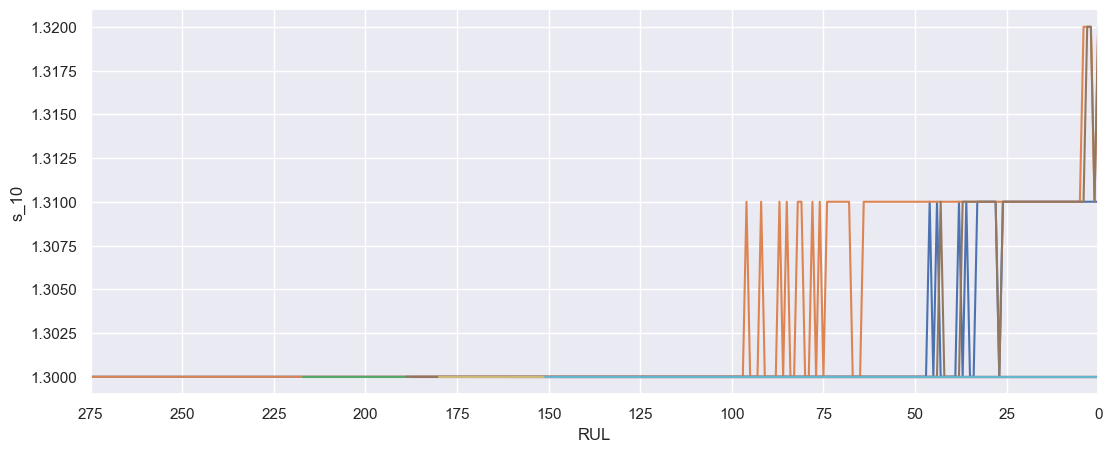

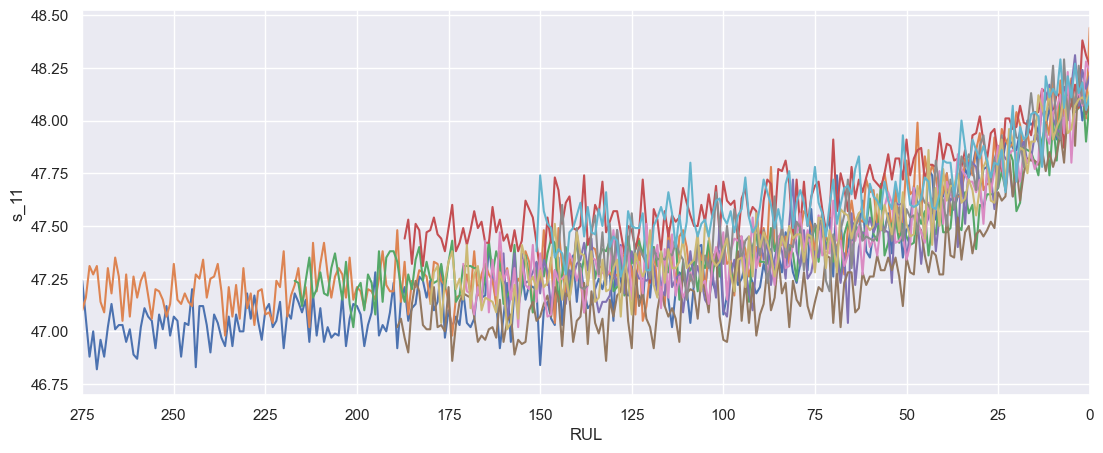

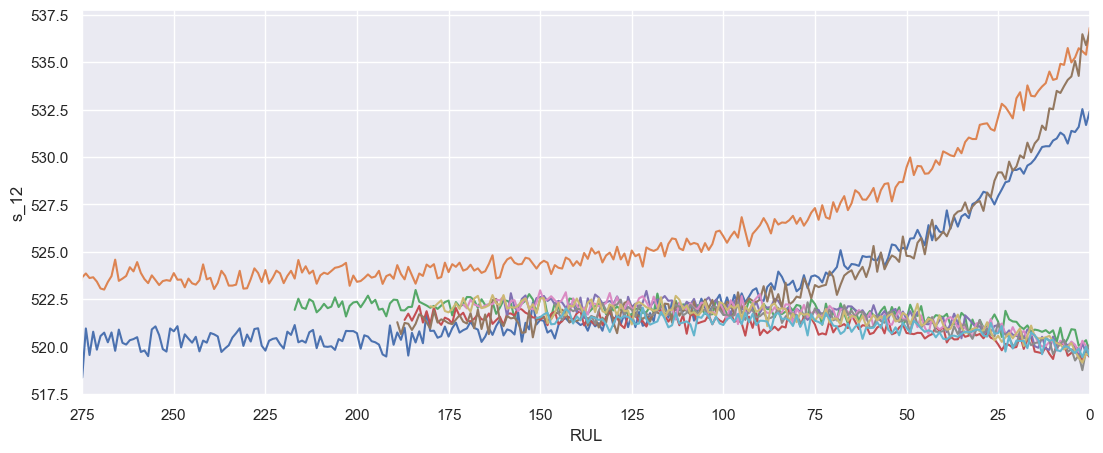

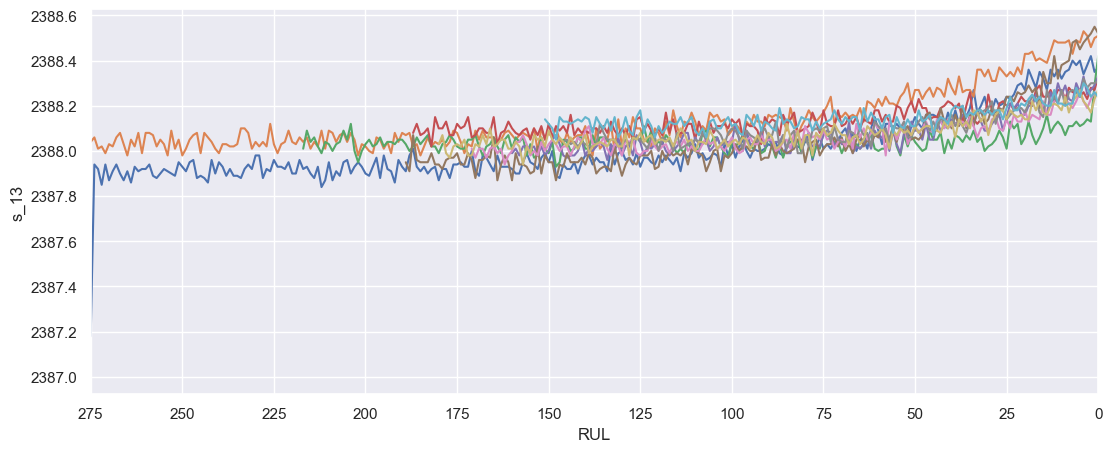

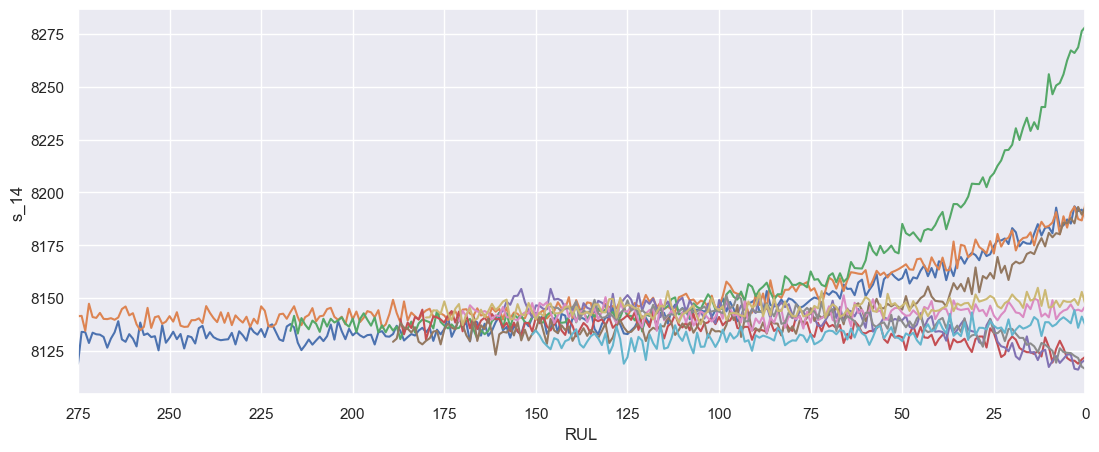

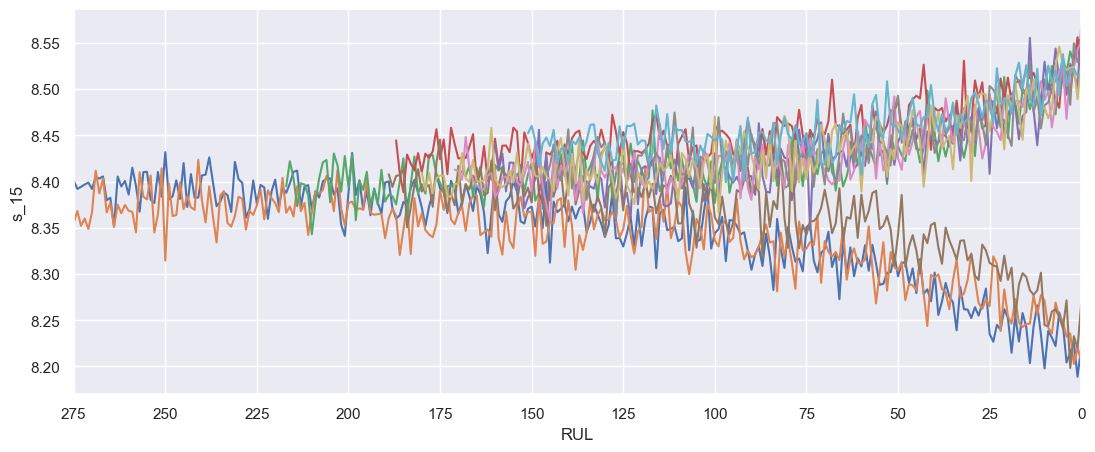

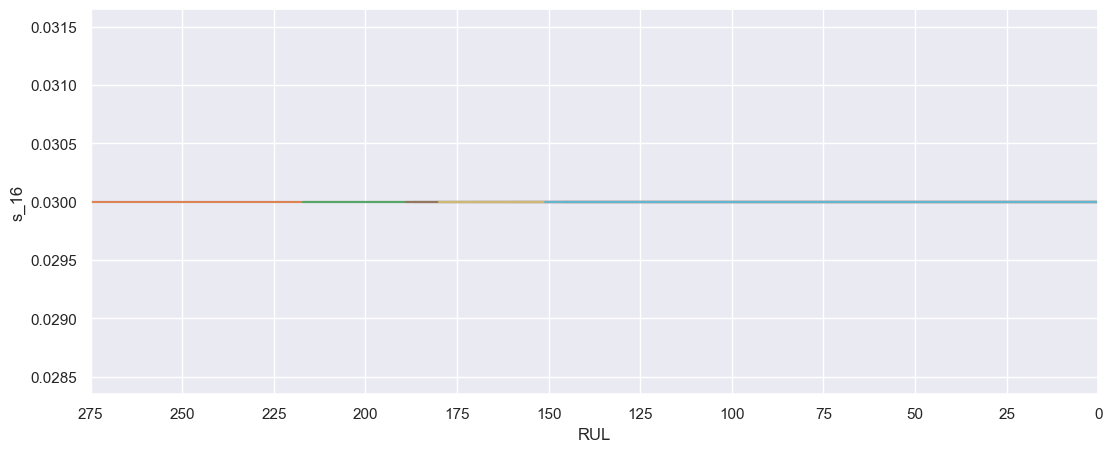

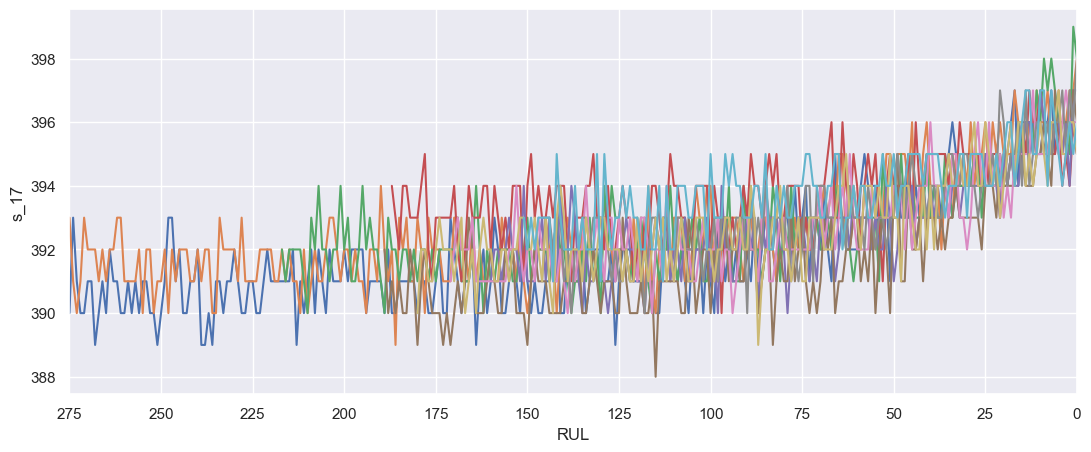

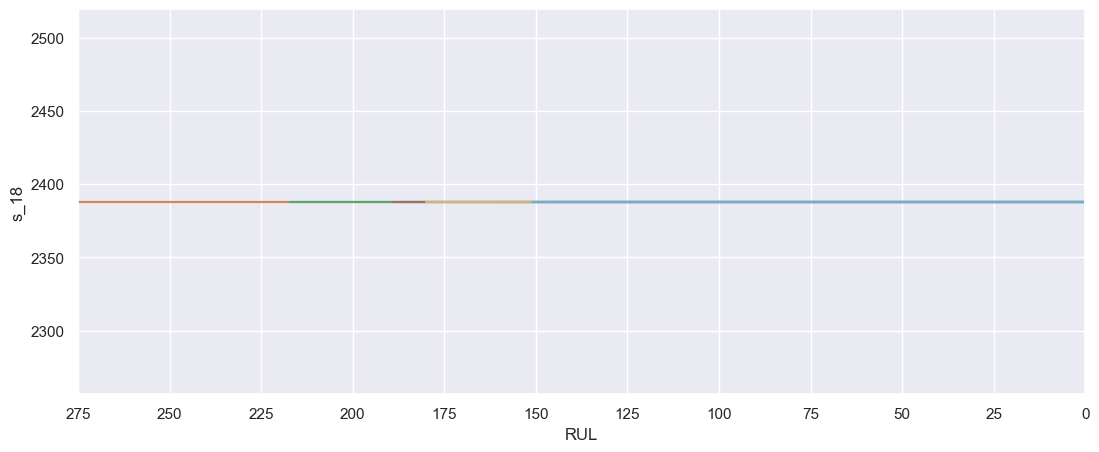

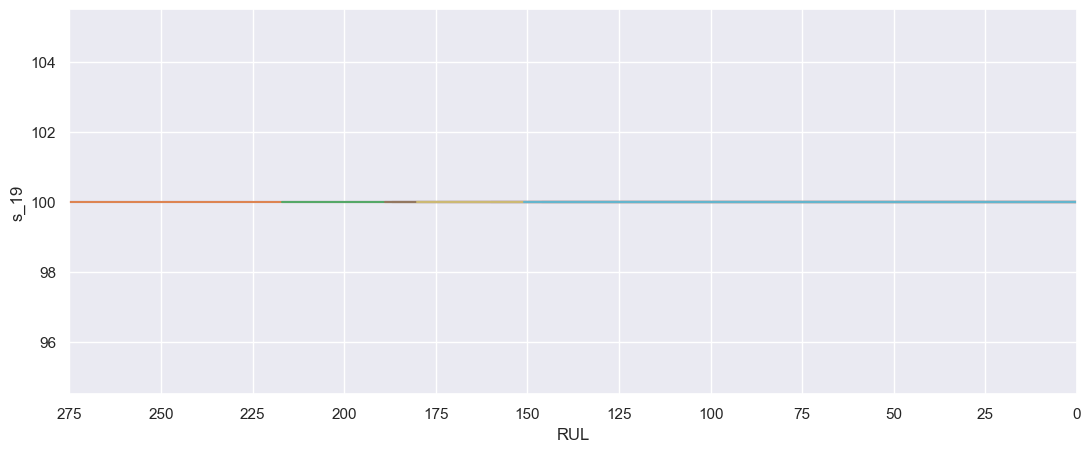

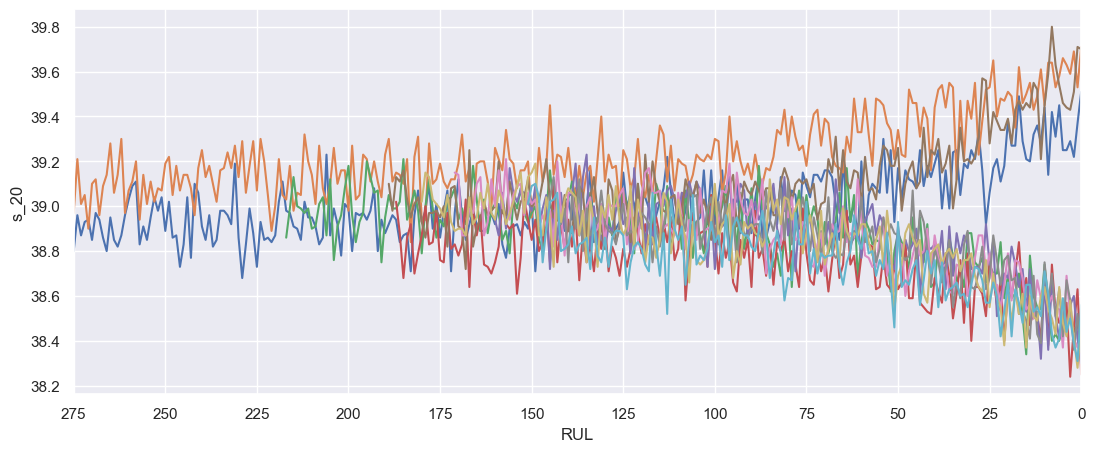

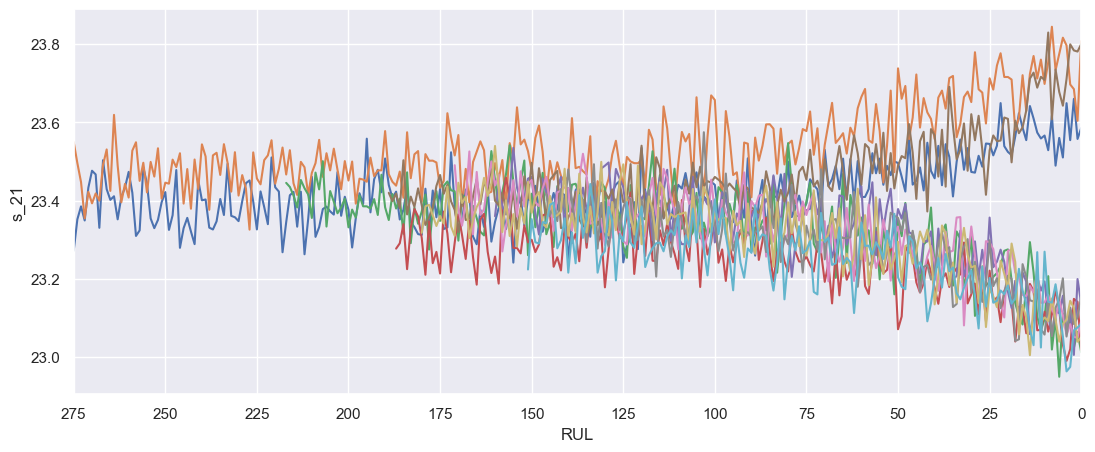

In [31]:
def plot_sinal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unidade'].unique():
        if (i % 10 == 0):  
            plt.plot('RUL', signal_name, 
                     data=df[df['unidade']==i])
    plt.xlim(250, 0)  # Inverte o eixo x para ir de 250 ate 0
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('RUL')
    plt.show()

for sensor in sensor_names:
    plot_sinal(train, sensor)

# 3. Modelo de Referência

In [32]:
# Preparando os dados

# Removendo os sensores desnecessarios
drop_sensors = ['s_1','s_5','s_16','s_18','s_19']  # Vou manter o s_6 e s_10 por enquanto
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

# Separando o RUL do grupo de treino
X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
y_train_clipped = y_train.clip(upper=125)  # Cortando o RUL


# O valor real do RUL esta no ultimo ciclo de tempo de cada unidade
# Reorganizando o grupo de teste com esse ajuste
X_test = test.groupby('unidade').last().reset_index().drop(drop_labels, axis=1)

In [33]:
# Criando a funcao de avaliacao
def avaliar(y_verdadeiro, y_calculado, label='teste'):
    mse = mean_squared_error(y_verdadeiro, y_calculado)
    rmse = np.sqrt(mse)
    variancia = r2_score(y_verdadeiro, y_calculado)
    print('conjunto de {} -> RMSE:{}, R2:{}'.format(label, rmse, variancia))

In [34]:
# Criando e ajustando o modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

# Testando e avaliando o modelo treinado
y_hat_train = lm.predict(X_train)
avaliar(y_train, y_hat_train, 'treino')

y_hat_test = lm.predict(X_test)
avaliar(y_test, y_hat_test)

conjunto de treino -> RMSE:63.494471921833146, R2:0.5873657567234036
conjunto de teste -> RMSE:57.05730530062128, R2:-0.8998253079767999


# 4. Floresta Aleatória - Random Forest

In [35]:
# Criando e ajustando o regressor de floresta aleatória sem qualquer alteracao
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42)
rf.fit(X_train, y_train_clipped)

# Testando e avaliando o modelo treinado
y_hat_train = rf.predict(X_train)
avaliar(y_train_clipped, y_hat_train, 'treino')

y_hat_test = rf.predict(X_test)
avaliar(y_test, y_hat_test)

conjunto de treino -> RMSE:5.9199939580022525, R2:0.9787661901585051
conjunto de teste -> RMSE:21.05308450085165, R2:0.7413439613827657


In [36]:
# Analisando a forma de uma das arvores da floresta
print(rf.estimators_[5].tree_.max_depth)  # Quantos nos no caminho mais longo
rf.estimators_[5].tree_.n_node_samples    # Quantos samples nos ultimos nos

33


array([15616, 11694,  7793, ...,     1,     1,     4], dtype=int64)

In [37]:
# Refazendo o modelo com alguns ajustes
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42, 
                           max_depth=8, min_samples_leaf=50)
rf.fit(X_train, y_train_clipped)

# Testando e avaliando o modelo treinado
y_hat_train = rf.predict(X_train)
avaliar(y_train_clipped, y_hat_train, 'treino')

y_hat_test = rf.predict(X_test)
avaliar(y_test, y_hat_test)

conjunto de treino -> RMSE:15.706704198492831, R2:0.8505294865338602
conjunto de teste -> RMSE:20.994958823842456, R2:0.7427702419664686


# 5. Enxergando a RF

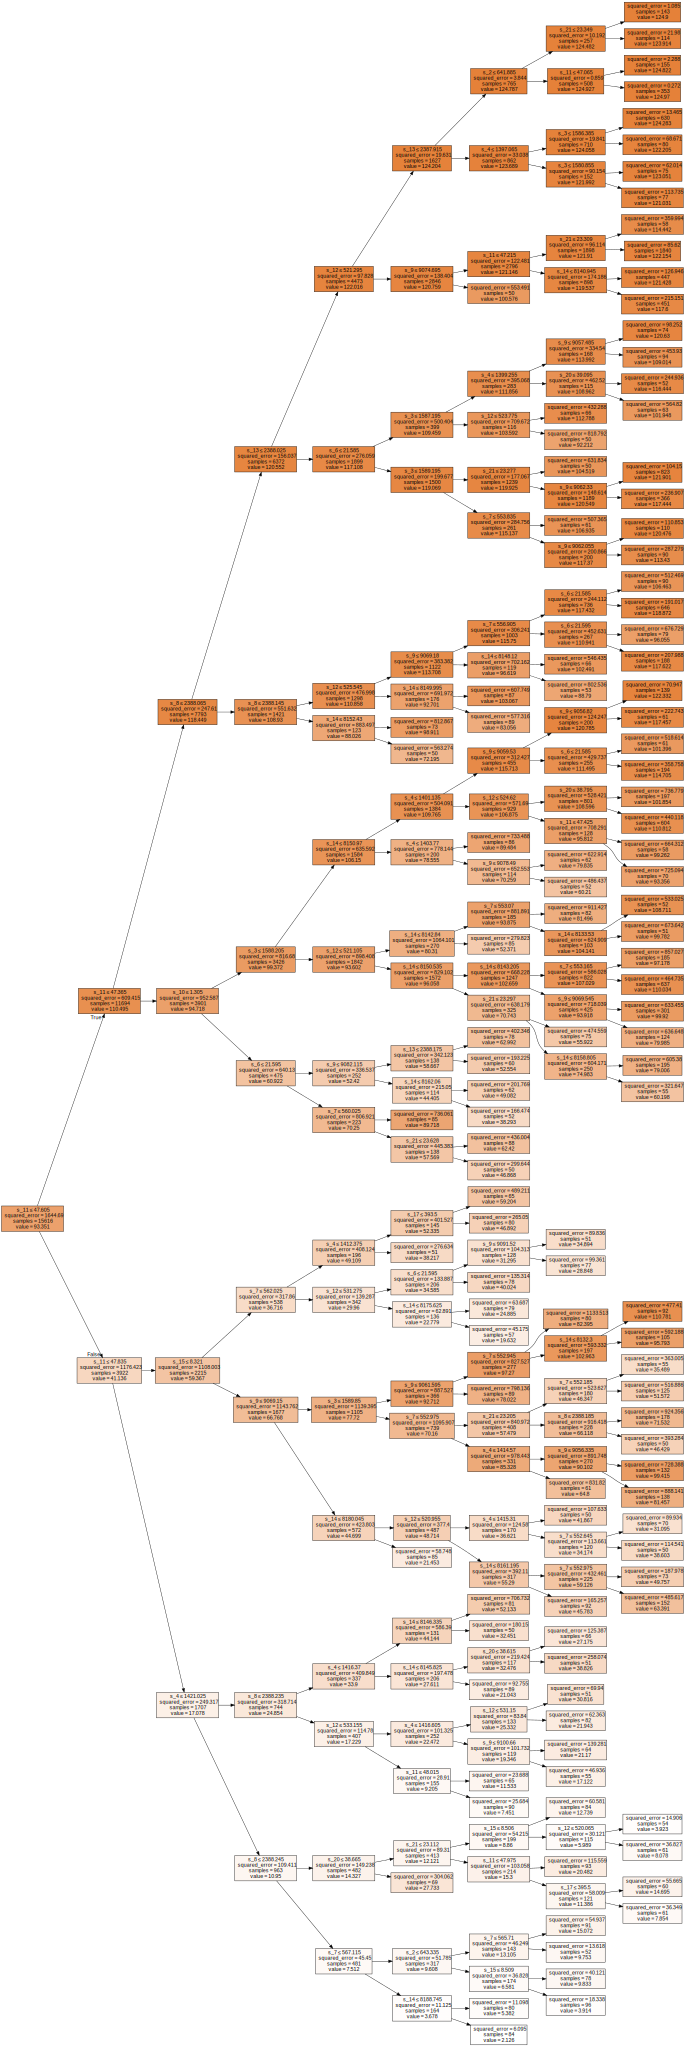

In [38]:
def export_rf_visual(estimator):
    # Criando representacao da arvore de decisao
    dot_data = export_graphviz(estimator, 
       out_file=None,
       feature_names=X_train.columns,
       filled=True,        
       special_characters=True, 
       rotate=True)
    
    graph = graphviz.Source(dot_data)
    return(graph)


# Exibindo no notebook
export_rf_visual(rf.estimators_[5])

# 6. Hiperparâmetros

In [39]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

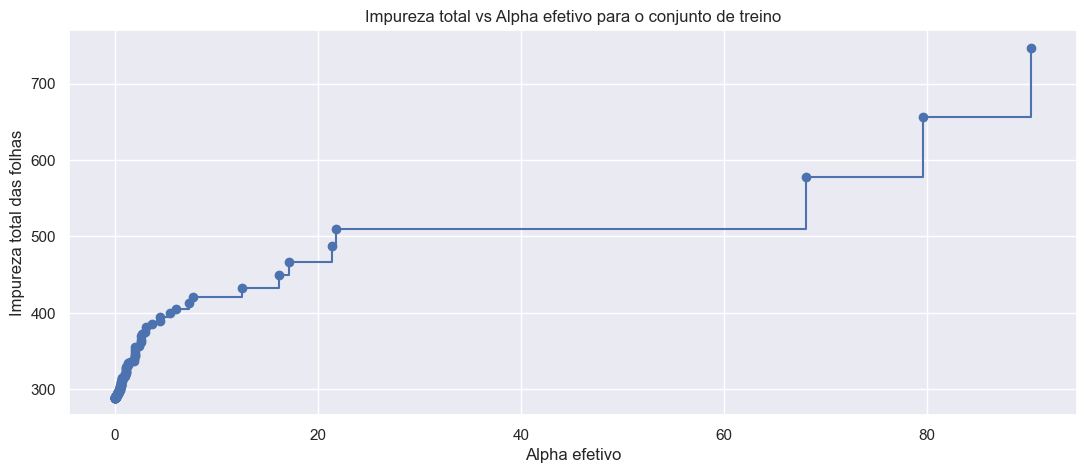

In [40]:
# Obtendo ccp_alphas
path = rf.estimators_[5].cost_complexity_pruning_path(X_train, y_train_clipped)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(13,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")  
ax.set_xlabel("Alpha efetivo")
ax.set_ylabel("Impureza total das folhas")
ax.set_title("Impureza total vs Alpha efetivo para o conjunto de treino")
plt.show()

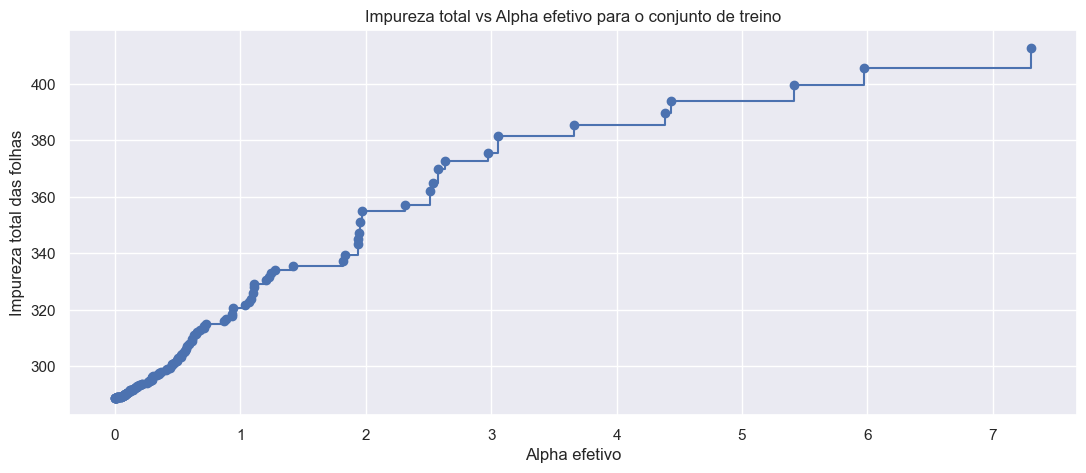

In [41]:
# zoom in
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(ccp_alphas[:-10], impurities[:-10], marker='o', drawstyle="steps-post")
ax.set_xlabel("Alpha efetivo")
ax.set_ylabel("Impureza total das folhas")
ax.set_title("Impureza total vs Alpha efetivo para o conjunto de treino")
plt.show()

In [42]:
rf_dict = {
    'id_node': list(range(rf.estimators_[5].tree_.node_count)),
    'impurity': rf.estimators_[5].tree_.impurity,
    'samples': rf.estimators_[5].tree_.n_node_samples,
    'id_left_child': rf.estimators_[5].tree_.children_left,
    'id_right_child': rf.estimators_[5].tree_.children_right
}

impurity_df = pd.DataFrame(rf_dict)
print(impurity_df.shape)
impurity_df.head(10)

(227, 5)


,id_node,impurity,samples,id_left_child,id_right_child
0,0,1644.689840,15616,1,128
1,1,609.414829,11694,2,71
2,2,247.609863,7793,3,52
3,3,156.037153,6372,4,29
4,4,97.827624,4473,5,20
5,5,19.630575,1627,6,13
6,6,3.844416,765,7,10
7,7,10.192376,257,8,9
8,8,1.085113,143,-1,-1
9,9,21.980353,114,-1,-1


In [43]:
# Calculando o min_impurity_decrease
impurity_df['impurity_decrease'] = np.nan
samples_total = rf.estimators_[5].tree_.node_count

for idx in impurity_df.index[1:]:  # Pulando o primeiro no, ja que n ha divisoes antes dele
    if impurity_df.iloc[idx]['id_left_child'] == -1:
        continue  # n eh possivel calcular o decaimento da impureza para folhas, ja que n ha divisoes apos elas
    else:
        impurity_P, samples_P = impurity_df.iloc[idx][['impurity', 'samples']]
        id_L, id_R = impurity_df.iloc[idx][['id_left_child', 'id_right_child']].astype(int)
        impurity_L, samples_L = impurity_df.iloc[id_L][['impurity', 'samples']]
        impurity_R, samples_R = impurity_df.iloc[id_R][['impurity', 'samples']]
        
        impurity_decrease = samples_P / samples_total * (
            impurity_P - samples_R / samples_P * impurity_R - 
            samples_L / samples_P * impurity_L
            )
        impurity_df.at[idx, 'impurity_decrease'] = impurity_decrease

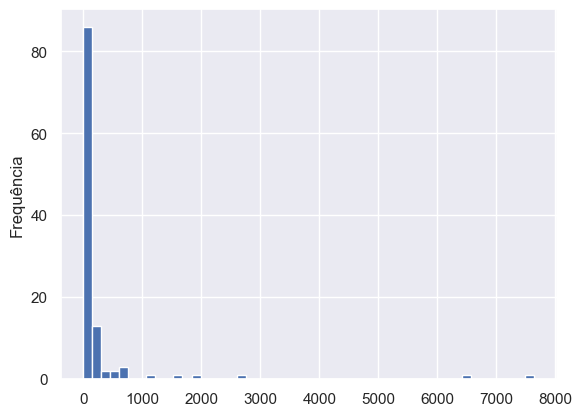

In [44]:
# Histograma do decaimento de impureza
impurity_df['impurity_decrease'].plot(kind='hist', bins=50)
plt.ylabel('Frequência')
plt.show()

In [45]:
# Dados estatísticos
impurity_df['impurity_decrease'].describe()

count     112.000000
mean      282.515265
std       994.407842
min        -0.506232
25%        14.589094
50%        47.024819
75%       129.095879
max      7639.300570
Name: impurity_decrease, dtype: float64

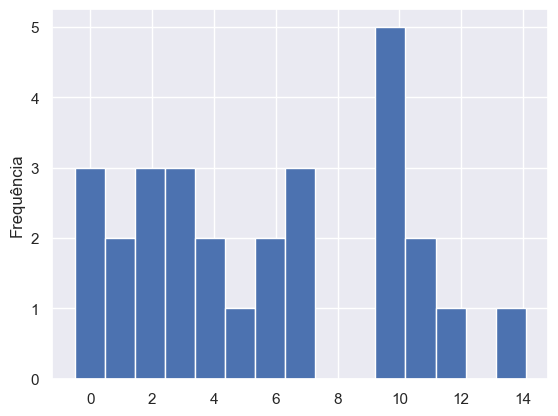

In [46]:
# Zoom no histograma
impurity_df.loc[impurity_df['impurity_decrease'] < 14.59, 'impurity_decrease'].plot(kind='hist', bins=15)
plt.ylabel('Frequência')
plt.show()

# 7. Procura aleatória - Randomsearch

In [47]:
# Definindo os limites de cada parametro para a randomsearch
max_depth = [None] + list(range(3, 34, 3))
min_samples_leaf = list(range(1, 102, 10))
min_impurity_decrease = list(np.arange(0,147)/10)  
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))  

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    'ccp_alpha': ccp_alpha
}

tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print(tuning_options)

1571724


In [48]:
# Criando um conjunto de validação e evitando o vazamento dos dados com o uso do GroupKFold

from sklearn.model_selection import RandomizedSearchCV, GroupKFold

ITERATIONS = 300

rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42)
gkf = GroupKFold(n_splits=3)


regressor = RandomizedSearchCV(rf, 
                               parameters, 
                               cv = gkf.split(train, groups=train['unidade']),
                               verbose=2, 
                               error_score='raise',
                               n_iter=ITERATIONS, 
                               n_jobs=-2,
                               # scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                               scoring= 'neg_root_mean_squared_error')  
regressor.fit(X_train, y_train_clipped)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001F65F600D60>,
                   error_score='raise',
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   random_state=42),
                   n_iter=300, n_jobs=-2,
                   param_distributions={'ccp_alpha': [0.0, 0.025, 0.05, 0.075,
                                                      0.1, 0.125, 0.15, 0.175,
                                                      0.2, 0.225, 0.25, 0.275,
                                                      0.3, 0.325, 0.35, 0.375,
                                                      0.4, 0.425, 0.45, 0.475,
                                                      0.5, 0.525, 0.55, 0.575,
                                                      0.6, 0.625, 0.65, 0.675,
                                                      0.7, 0.725, ...],
                                        'max_depth': [None, 3, 6, 9, 12, 15, 18,
                                                      21, 24, 27, 30, 33],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4, 0.5,
                                                                  0.6, 0.7, 0.8,
                                                                  0.9, 1.0, 1.1,
                                                                  1.2, 1.3, 1.4,
                                                                  1.5, 1.6, 1.7,
                                                                  1.8, 1.9, 2.0,
                                                                  2.1, 2.2, 2.3,
                                                                  2.4, 2.5, 2.6,
                                                                  2.7, 2.8, 2.9, ...],
                                        'min_samples_leaf': [1, 11, 21, 31, 41,
                                                             51, 61, 71, 81, 91,
                                                             101]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
resultado = pd.DataFrame(regressor.cv_results_)
columns = ['param_min_samples_leaf', 'param_min_impurity_decrease', 'param_max_depth', 'param_ccp_alpha', 
           'mean_test_score', 'std_test_score', 'rank_test_score']
resultado[columns].sort_values('mean_test_score', ascending=False)

,param_min_samples_leaf,param_min_impurity_decrease,param_max_depth,param_ccp_alpha,mean_test_score,std_test_score,rank_test_score
29,1,0.0,27,0.6,-16.664717,0.298370,1
226,11,0.5,None,0.875,-16.797077,0.271788,2
12,51,0.3,15,0.225,-16.881351,0.372319,3
86,21,1.0,9,1.175,-17.000426,0.286578,4
261,51,0.7,24,0.175,-17.008349,0.380368,5
...,...,...,...,...,...,...,...
249,51,13.1,3,0.95,-19.115996,0.512284,296
281,51,13.3,3,1.425,-19.118629,0.512734,297
219,71,12.2,3,0.275,-19.119410,0.520806,298
85,1,13.9,3,1.75,-19.124909,0.511761,299


In [50]:
# Melhores parametros
print(regressor.best_params_)
print(regressor.best_score_)

{'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_depth': 27, 'ccp_alpha': 0.6}
-16.664716555107503


# 8. Modelo Final

In [51]:
# Usando os melhores parametros para treinar o modelo final
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           min_samples_leaf=11, min_impurity_decrease=0.0, 
                           max_depth=15, ccp_alpha=0.125)
rf.fit(X_train, y_train_clipped)

# Testando e avaliando o modelo
y_hat_train = rf.predict(X_train)
avaliar(y_train_clipped, y_hat_train, 'treino')

y_hat_test = rf.predict(X_test)
avaliar(y_test, y_hat_test)

conjunto de treino -> RMSE:13.95446880579081, R2:0.8820190156933622
conjunto de teste -> RMSE:20.61288923394374, R2:0.7520472702746352
